In [1]:
!pip install rasterio matplotlib numpy seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 692.2 kB/s eta 0:00:001m698.6 kB/s eta 0:00:01


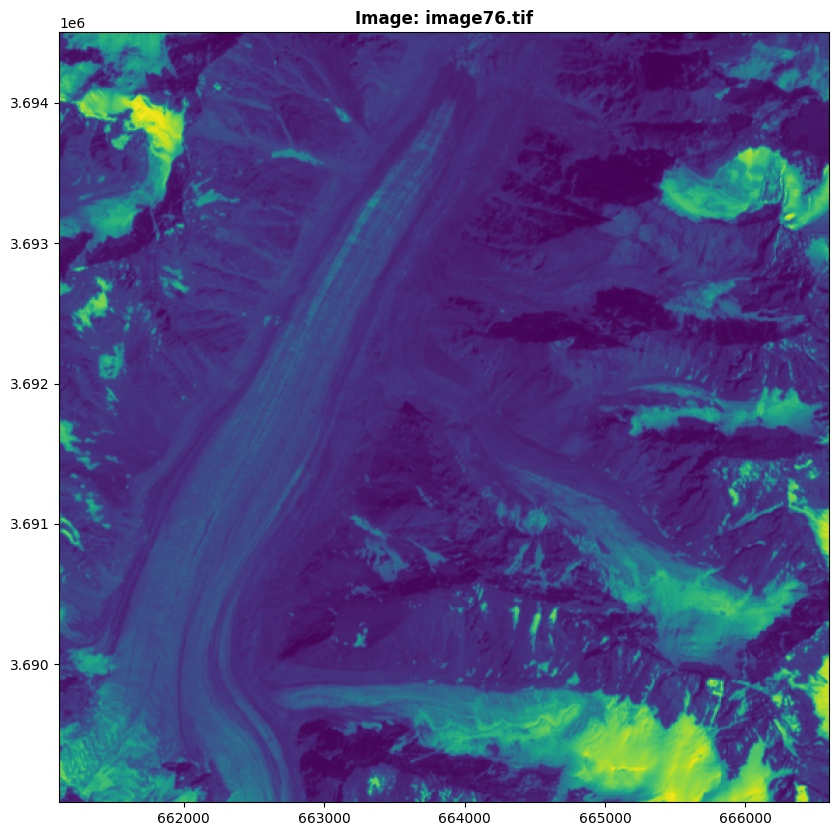

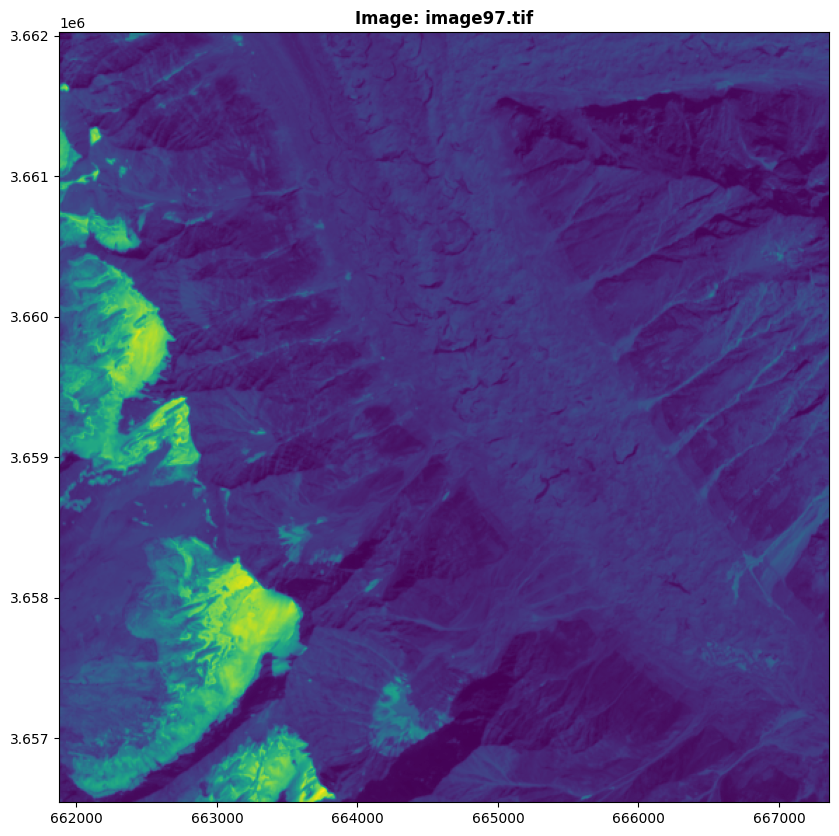

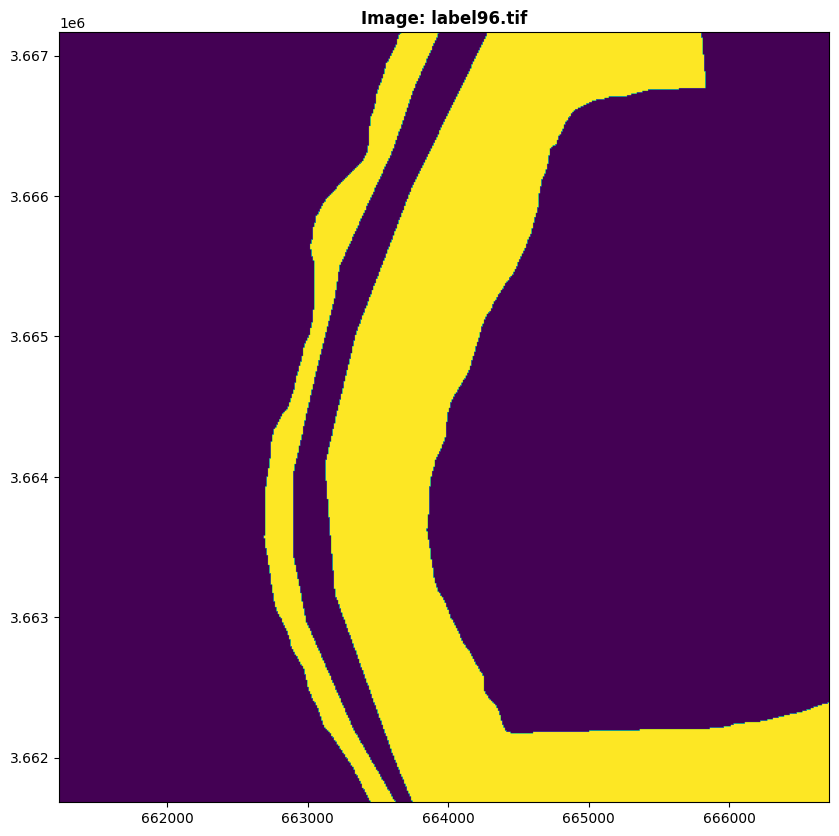

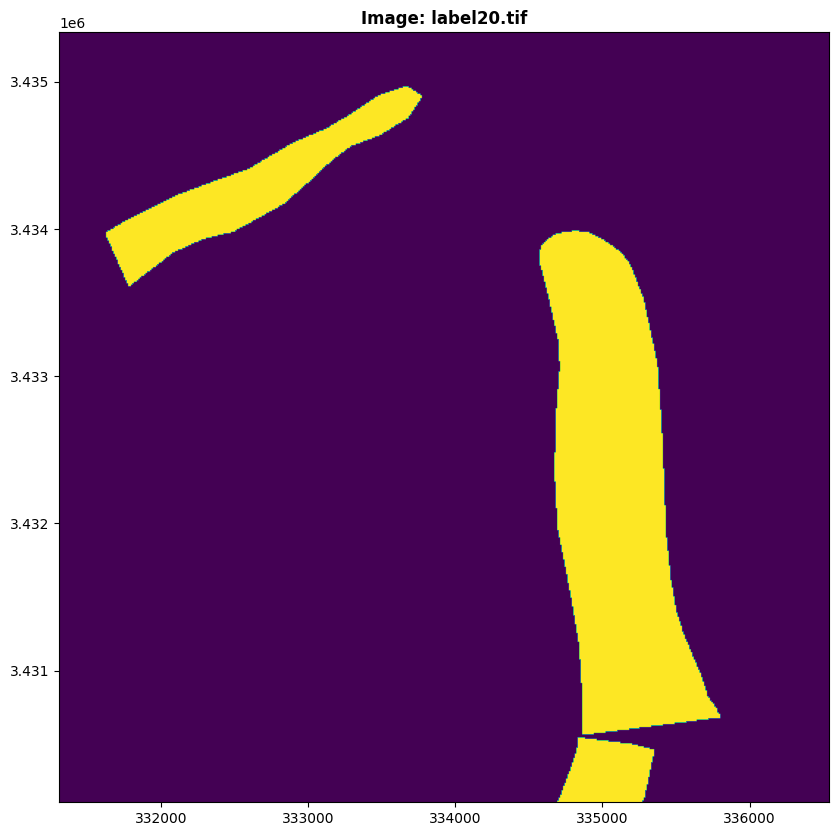

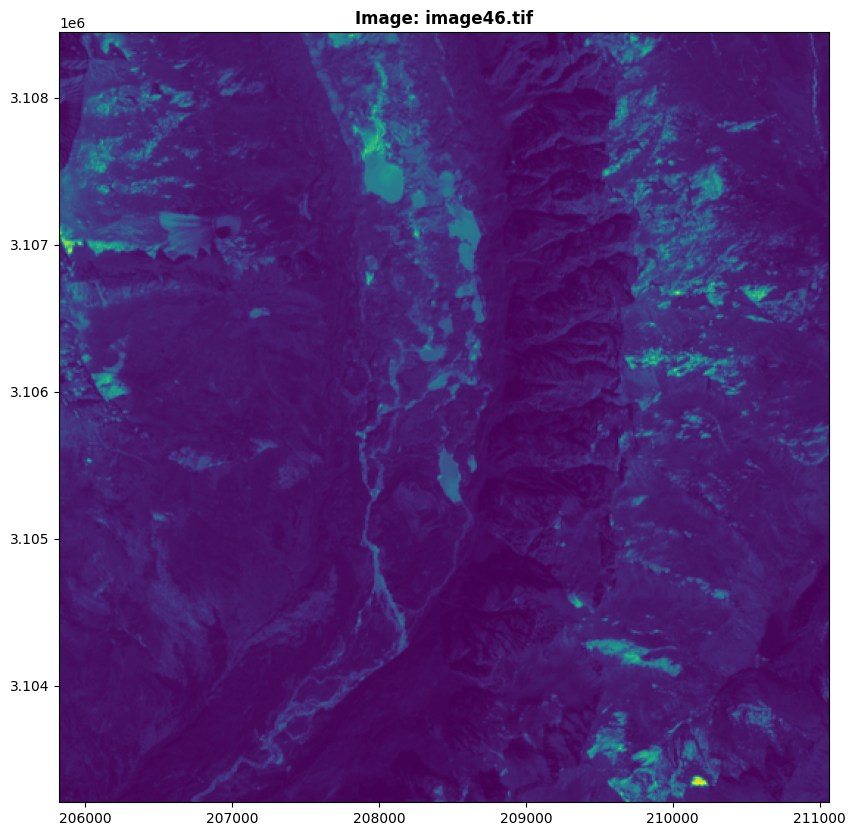

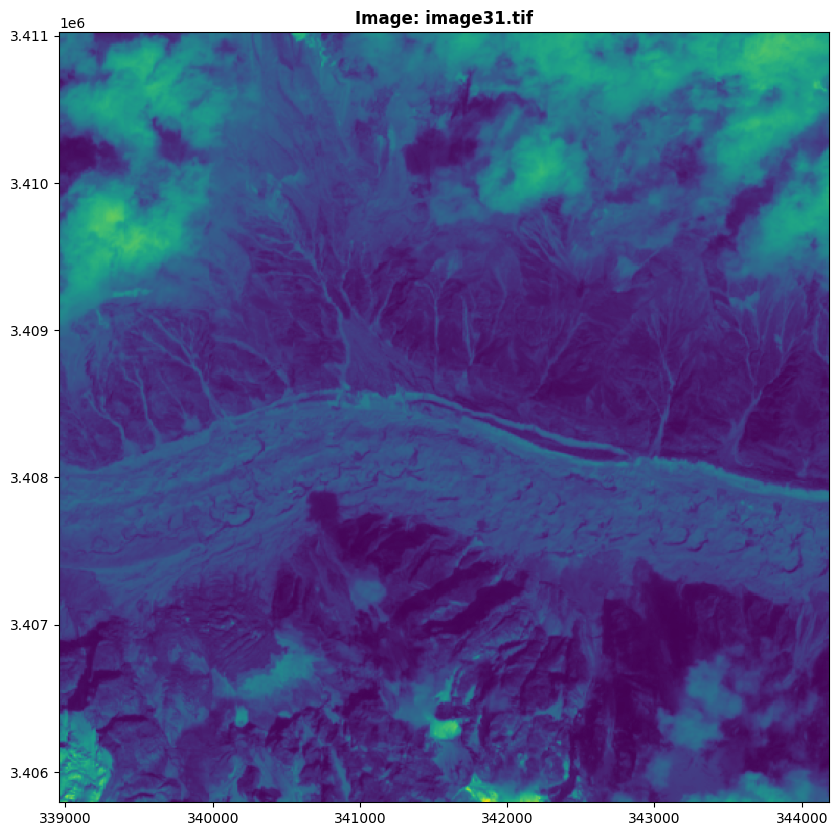

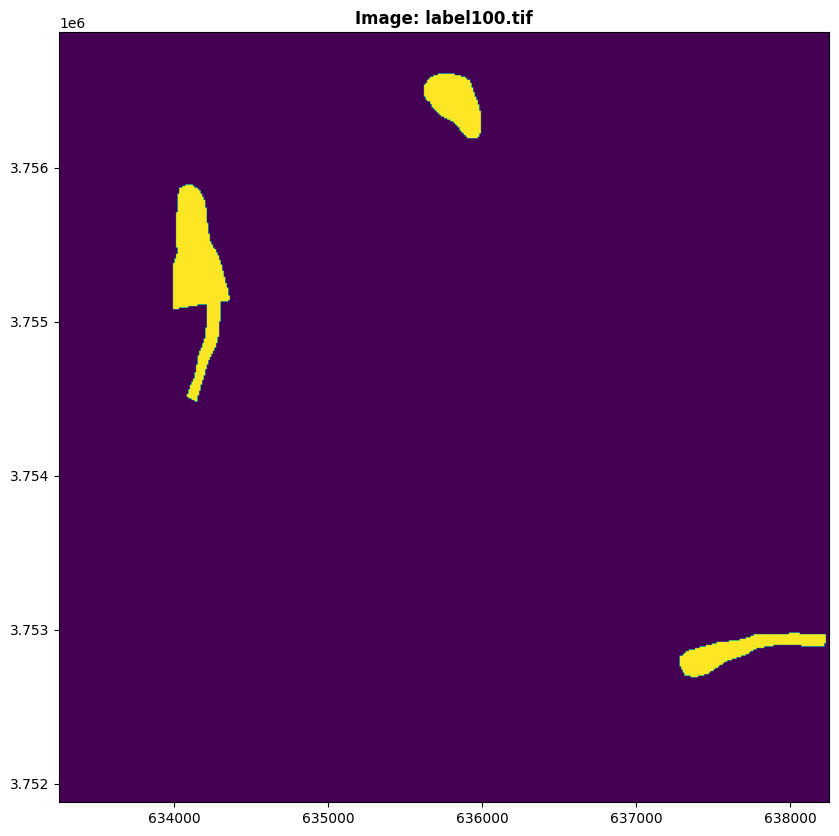

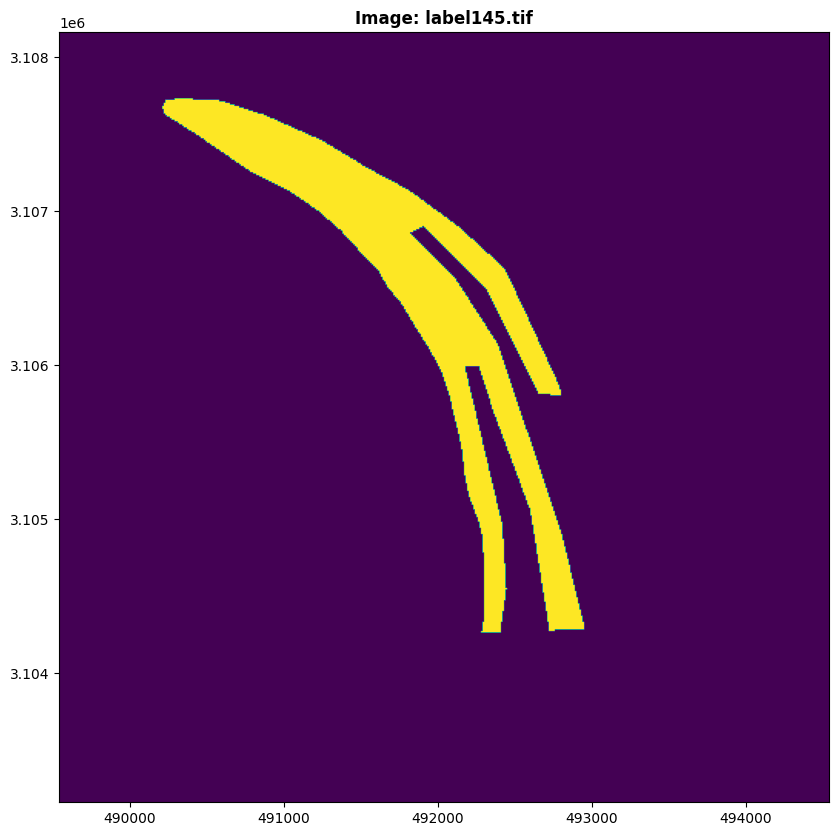

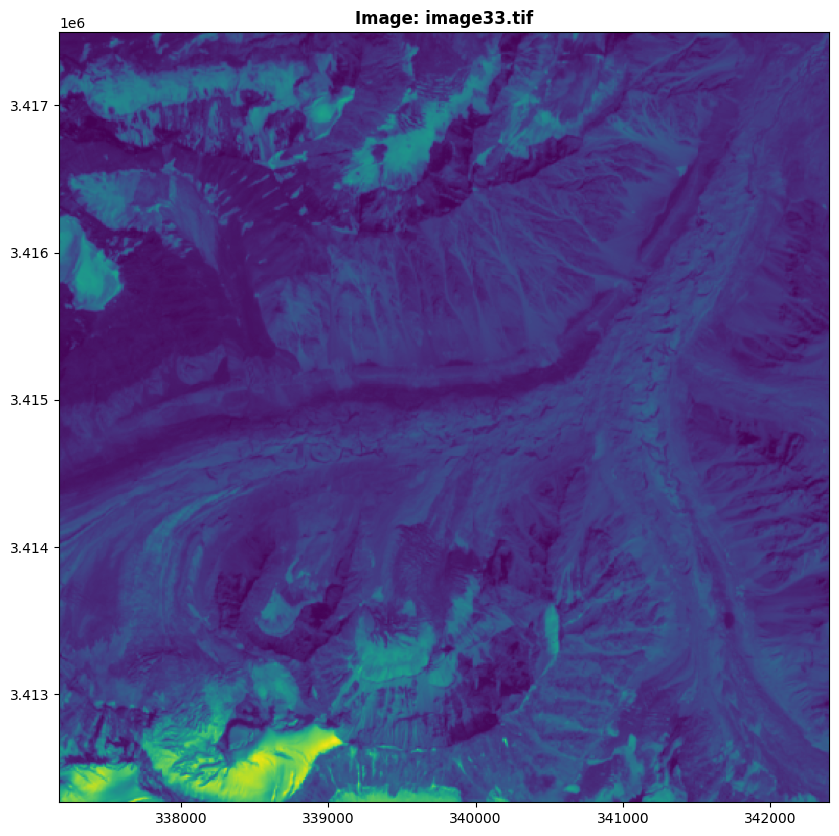

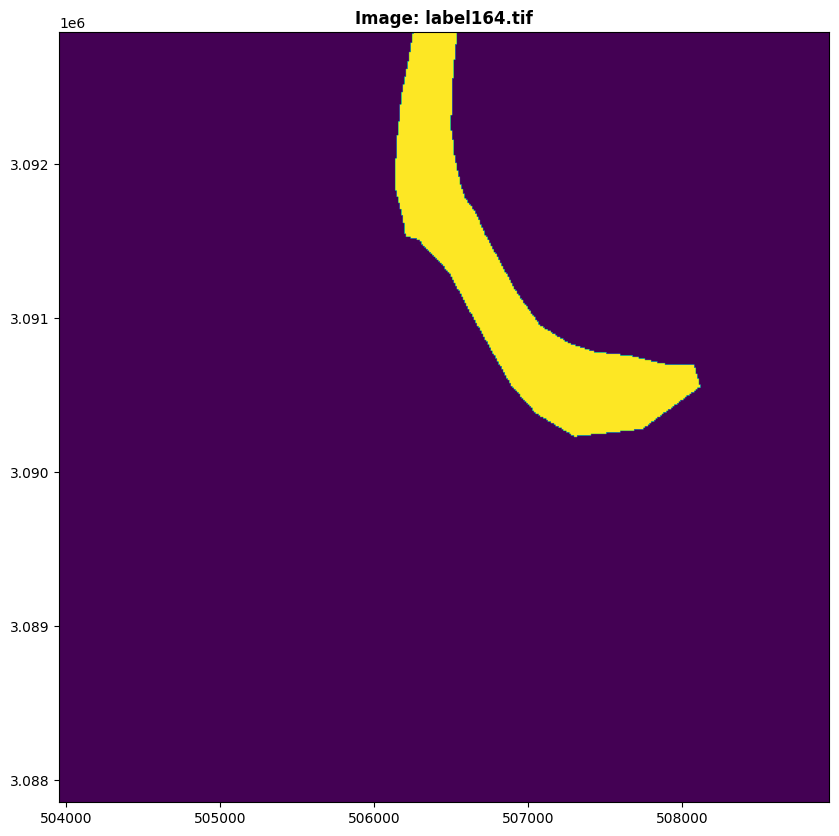

In [4]:
import os
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import random

def display_random_images(directory, num_images=10):
    """Display a specified number of random TIFF images from the directory"""
    tiff_files = [filename for filename in os.listdir(directory) if filename.endswith('.tif')]
    
    # Ensure we do not sample more images than available
    num_images = min(num_images, len(tiff_files))
    
    random_files = random.sample(tiff_files, num_images)
    
    for filename in random_files:
        file_path = os.path.join(directory, filename)
        with rasterio.open(file_path) as src:
            plt.figure(figsize=(10, 10))
            show(src, title=f"Image: {filename}")
            plt.show()

if __name__ == "__main__":
    # Adjust the path according to where your script is located relative to the Week 11 folder
    data_directory = '/home/usmanghias/UsmanGhias/Final_Year_Project/GitHub/FinalYearProject/Week 11/multi_spectral_data'
    display_random_images(data_directory)


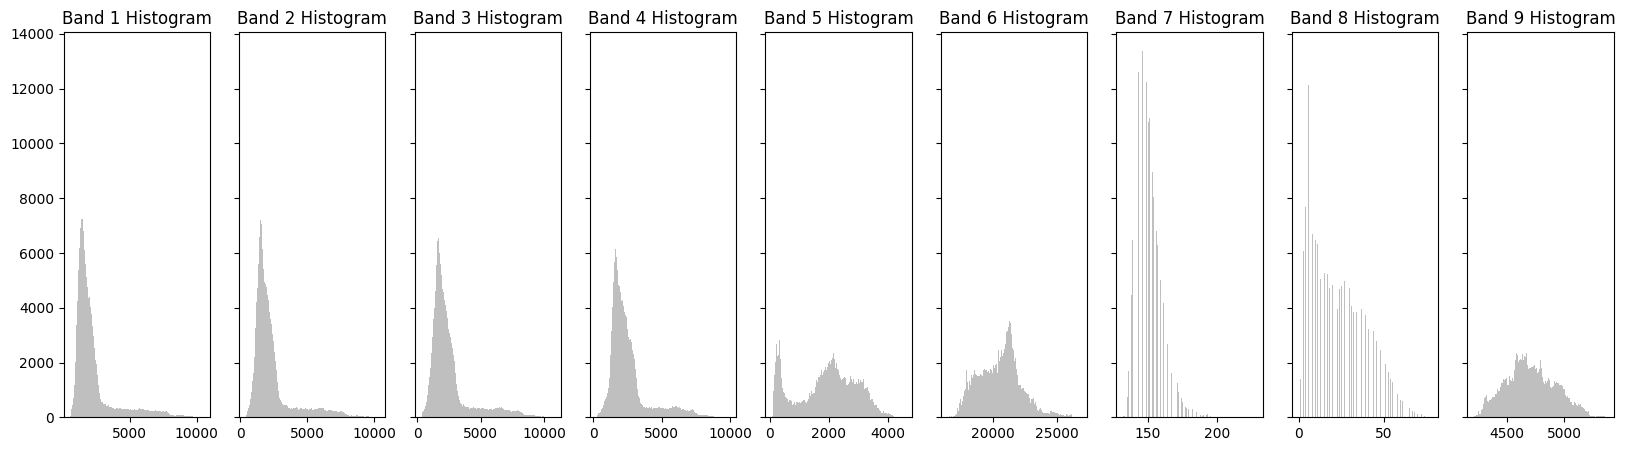

In [5]:
import rasterio
import matplotlib.pyplot as plt

def plot_histograms(file_path):
    """Plot histograms for each band in the TIFF image."""
    with rasterio.open(file_path) as src:
        fig, axs = plt.subplots(1, src.count, figsize=(20, 5), sharey=True)
        for i in range(1, src.count + 1):
            band = src.read(i)
            axs[i - 1].hist(band.flatten(), bins=256, color='gray', alpha=0.5)
            axs[i - 1].set_title(f'Band {i} Histogram')
        plt.show()

if __name__ == "__main__":
    file_path = '/home/usmanghias/UsmanGhias/Final_Year_Project/GitHub/FinalYearProject/Week 11/multi_spectral_data/image110.tif'
    plot_histograms(file_path)


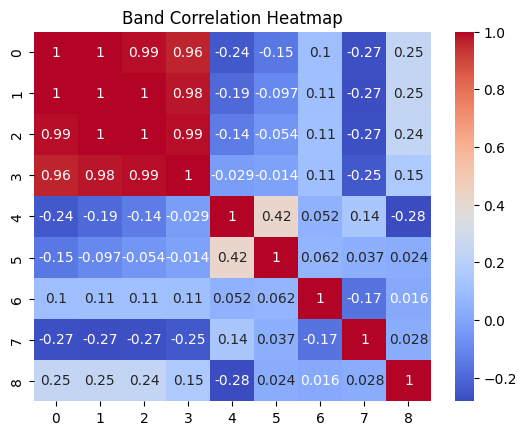

In [6]:
import rasterio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(file_path):
    """Plot a correlation heatmap for the bands of the TIFF image."""
    with rasterio.open(file_path) as src:
        data = np.array([src.read(i) for i in range(1, src.count + 1)])
        correlation_matrix = np.corrcoef([band.flatten() for band in data])
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title('Band Correlation Heatmap')
        plt.show()

if __name__ == "__main__":
    file_path = '/home/usmanghias/UsmanGhias/Final_Year_Project/GitHub/FinalYearProject/Week 11/multi_spectral_data/image115.tif'
    plot_correlation_heatmap(file_path)


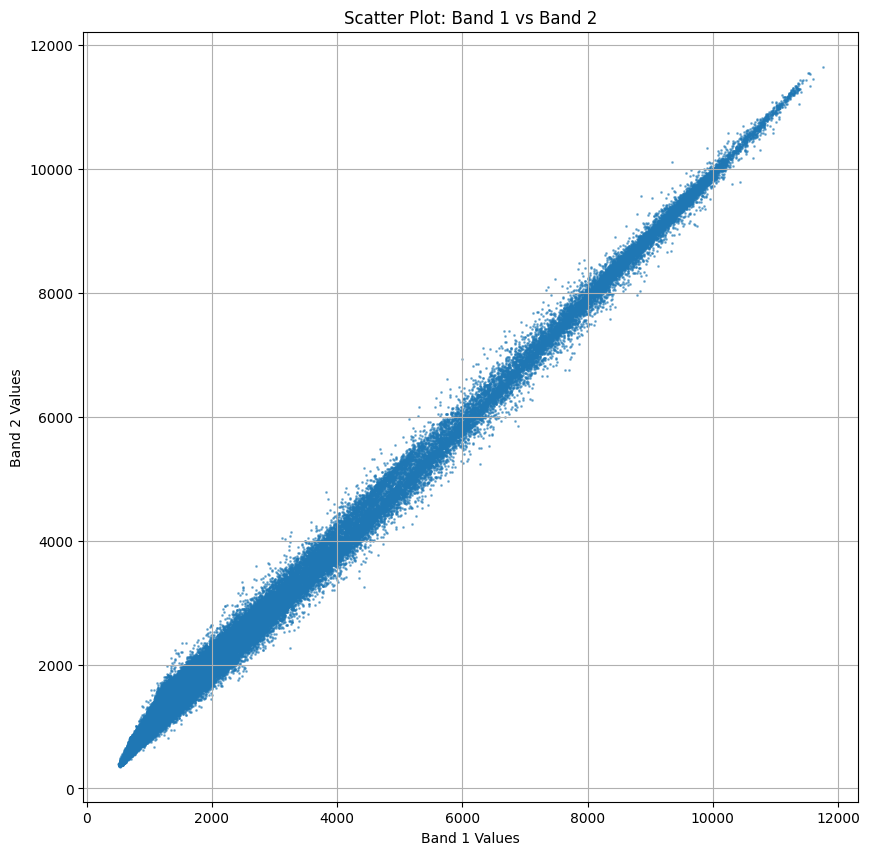

In [7]:
import rasterio
import matplotlib.pyplot as plt

def plot_band_scatter(file_path, band1_idx, band2_idx):
    """Plot scatter between two selected bands of a TIFF image."""
    with rasterio.open(file_path) as src:
        band1 = src.read(band1_idx).flatten()
        band2 = src.read(band2_idx).flatten()
        plt.figure(figsize=(10, 10))
        plt.scatter(band1, band2, alpha=0.5, s=1)
        plt.title(f'Scatter Plot: Band {band1_idx} vs Band {band2_idx}')
        plt.xlabel(f'Band {band1_idx} Values')
        plt.ylabel(f'Band {band2_idx} Values')
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    file_path = '/home/usmanghias/UsmanGhias/Final_Year_Project/GitHub/FinalYearProject/Week 11/multi_spectral_data/image112.tif'
    plot_band_scatter(file_path, 1, 2)  # Update these band indices as needed


In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Read and Visualize a Multispectral Image

In [16]:
# Path
image_path = '/home/usmanghias/UsmanGhias/Final_Year_Project/GitHub/FinalYearProject/Week 11/multi_spectral_data/image110.tif'

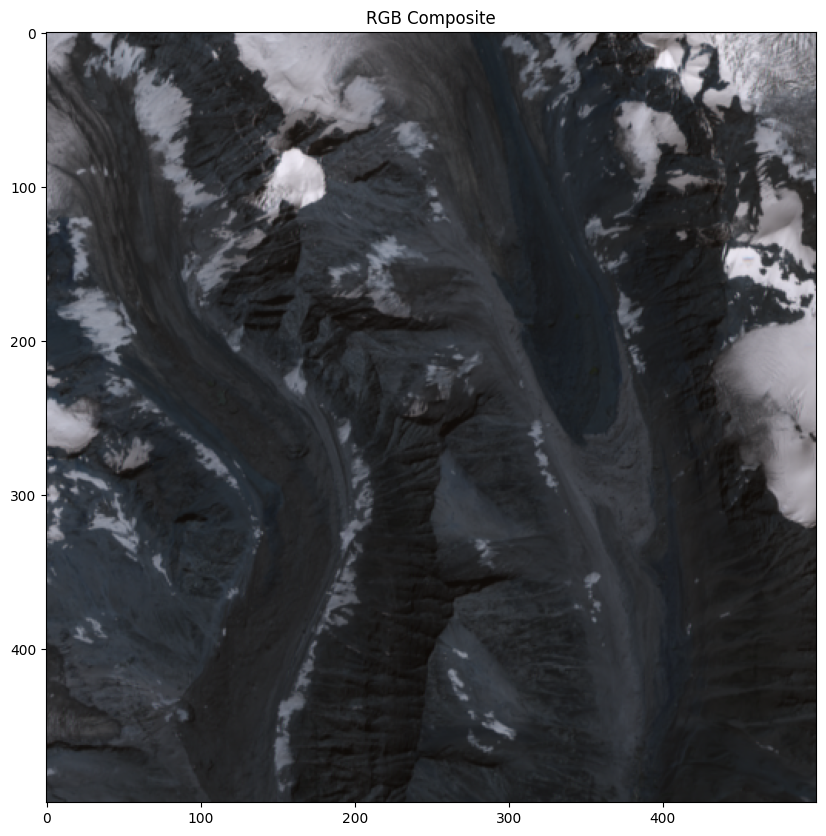

Metadata: {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 500, 'height': 500, 'count': 9, 'crs': CRS.from_epsg(32643), 'transform': Affine(10.00000000000745, 0.0, 615430.0124002658,
       0.0, -9.999999999985098, 3721795.36095055)}


In [18]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

def read_and_visualize_image(image_path):
    with rasterio.open(image_path) as src:
        bands = src.read()
        
        # Assuming bands 1, 2, and 3 are RGB
        rgb_image = np.stack([bands[i] for i in [0, 1, 2]], axis=-1)
        rgb_image = rgb_image / rgb_image.max()  # Normalize for visualization
        
        plt.figure(figsize=(10, 10))
        plt.imshow(rgb_image)
        plt.title('RGB Composite')
        plt.show()

        print("Metadata:", src.meta)

# Specify your image path
image_path = "/home/usmanghias/UsmanGhias/Final_Year_Project/GitHub/FinalYearProject/Week 11/multi_spectral_data/image110.tif"
read_and_visualize_image(image_path)


In [12]:
# Visualize and Analyze Individual Bands

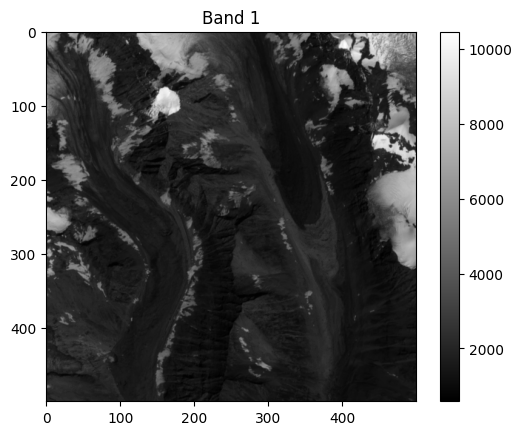

Band 1 Statistics:
Min: 586
Max: 10470
Mean: 2306.646036
Standard Deviation: 1587.6215065441404



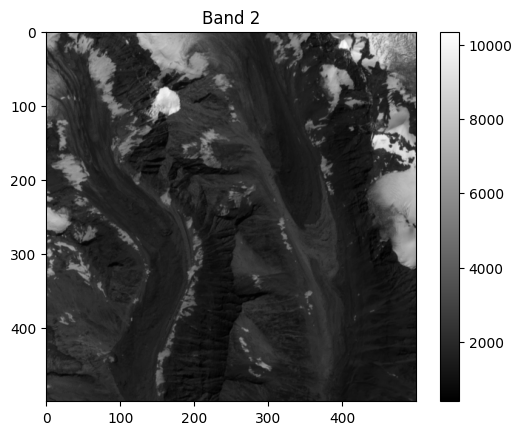

Band 2 Statistics:
Min: 408
Max: 10346
Mean: 2369.598456
Standard Deviation: 1559.944162765583



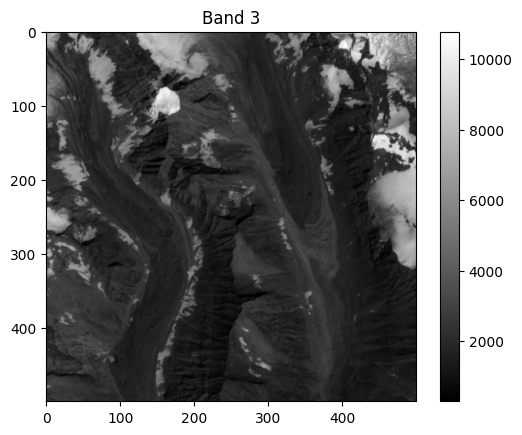

Band 3 Statistics:
Min: 298
Max: 10784
Mean: 2540.248468
Standard Deviation: 1648.6239948477194



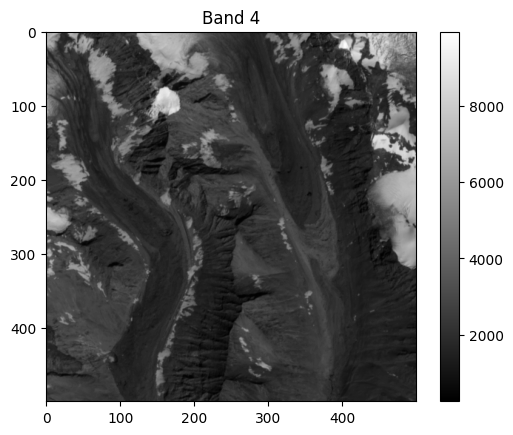

Band 4 Statistics:
Min: 248
Max: 9954
Mean: 2554.699128
Standard Deviation: 1462.4566459803314



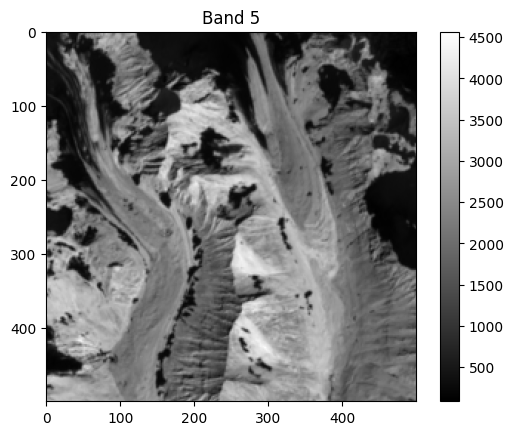

Band 5 Statistics:
Min: 88
Max: 4566
Mean: 1924.00858
Standard Deviation: 1009.3130305085651



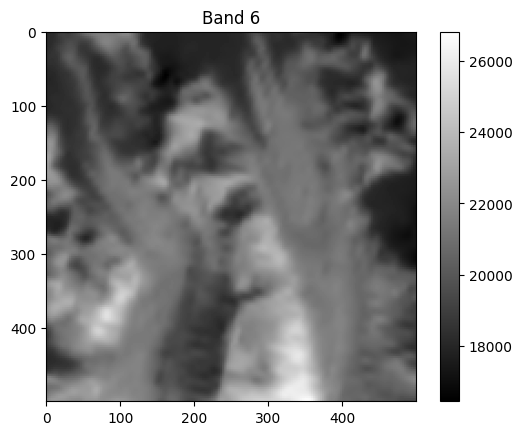

Band 6 Statistics:
Min: 16440
Max: 26825
Mean: 20510.395752
Standard Deviation: 1655.1414277953272



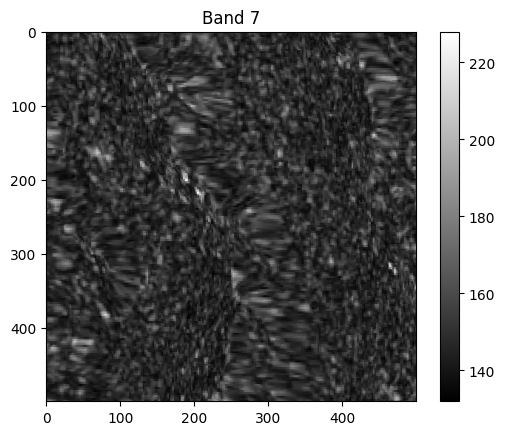

Band 7 Statistics:
Min: 132
Max: 228
Mean: 150.327208
Standard Deviation: 9.126555918019458



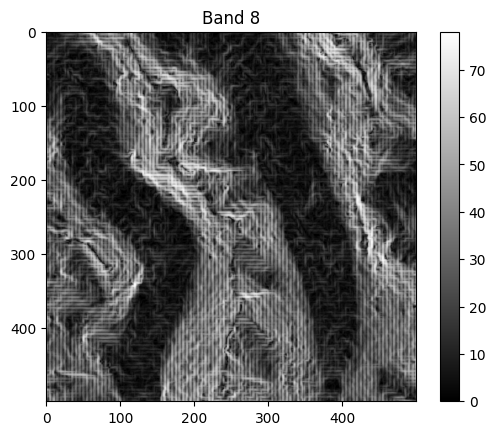

Band 8 Statistics:
Min: 0
Max: 78
Mean: 23.910964
Standard Deviation: 15.737472115645



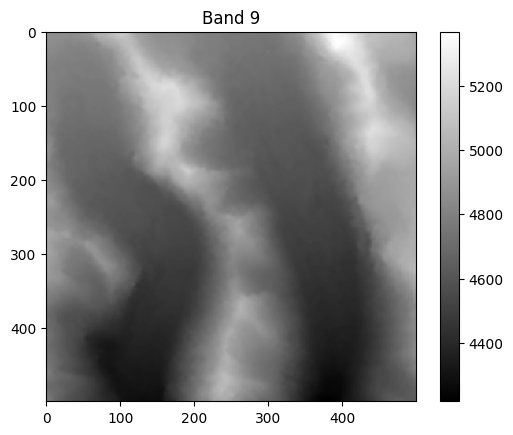

Band 9 Statistics:
Min: 4218
Max: 5368
Mean: 4709.257264
Standard Deviation: 212.41260956740376



In [19]:
def visualize_and_analyze_individual_bands(image_path):
    with rasterio.open(image_path) as src:
        bands = src.read()
        for i, band in enumerate(bands):
            plt.figure()
            plt.imshow(band, cmap='gray')
            plt.colorbar()
            plt.title(f'Band {i+1}')
            plt.show()
            
            print(f'Band {i+1} Statistics:')
            print(f'Min: {band.min()}')
            print(f'Max: {band.max()}')
            print(f'Mean: {band.mean()}')
            print(f'Standard Deviation: {band.std()}\n')

visualize_and_analyze_individual_bands(image_path)


In [14]:
# Calculate and Display NDVI

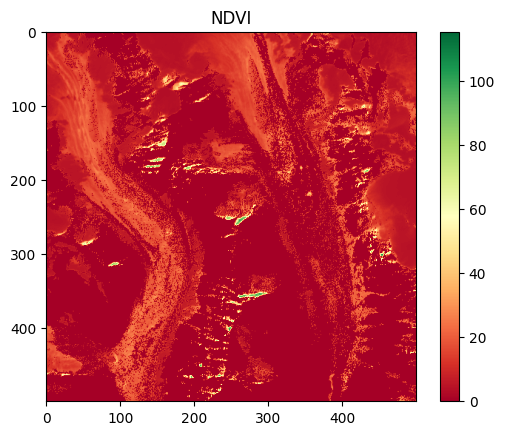

In [20]:
def calculate_and_display_ndvi(image_path, red_band_index, nir_band_index):
    with rasterio.open(image_path) as src:
        bands = src.read()
        red = bands[red_band_index]
        nir = bands[nir_band_index]
        ndvi = (nir - red) / (nir + red + 1e-10)  # Avoid division by zero

        plt.figure()
        plt.imshow(ndvi, cmap='RdYlGn')
        plt.colorbar()
        plt.title('NDVI')
        plt.show()

calculate_and_display_ndvi(image_path, 2, 3)  # Adjust indices as needed


In [ ]:
# Calculate and Display NDWI

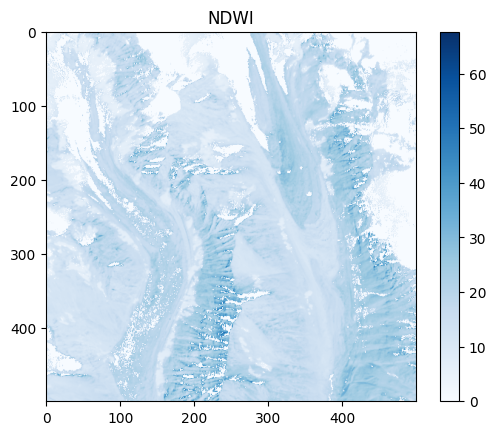

In [21]:
def calculate_and_display_ndwi(image_path, green_band_index, nir_band_index):
    with rasterio.open(image_path) as src:
        bands = src.read()
        green = bands[green_band_index]
        nir = bands[nir_band_index]
        ndwi = (green - nir) / (green + nir + 1e-10)  # Avoid division by zero

        plt.figure()
        plt.imshow(ndwi, cmap='Blues')
        plt.colorbar()
        plt.title('NDWI')
        plt.show()

calculate_and_display_ndwi(image_path, 1, 3)  # Adjust indices as needed


In [ ]:
# Stack Layers

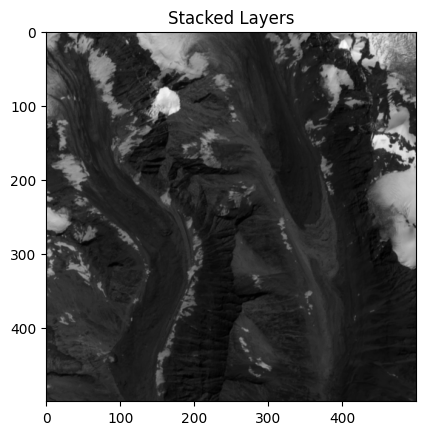

In [22]:
def stack_layers(image_path, bands_to_stack):
    with rasterio.open(image_path) as src:
        bands = src.read(bands_to_stack)
        stacked = np.mean(bands, axis=0)
        
        plt.figure()
        plt.imshow(stacked, cmap='gray')
        plt.title('Stacked Layers')
        plt.show()

stack_layers(image_path, [1, 2, 3])  # Stack first three bands
